In [1]:
'''!pip install tensorflow --upgrade
!pip install tensorflow-probability --upgrade
!pip install tf-keras --upgrade
!pip install scikit-image --upgrade
!pip install 'imageio==2.4.0'
!pip install pyvirtualdisplay
!pip install tf-agents
!pip install pyglet
!pip install pandas pandas-ta numpy'''

"!pip install tensorflow --upgrade\n!pip install tensorflow-probability --upgrade\n!pip install tf-keras --upgrade\n!pip install scikit-image --upgrade\n!pip install 'imageio==2.4.0'\n!pip install pyvirtualdisplay\n!pip install tf-agents\n!pip install pyglet\n!pip install pandas pandas-ta numpy"

In [1]:
import os
# Keep using keras-2 (tf-keras) rather than keras-3 (keras).
os.environ['TF_USE_LEGACY_KERAS'] = '1'

from envs.moving_average_env import MovingAverageEnv
from envs.rsi_env import RsiEnv
from envs.macd_env import MacdEnv
from utils import load_dataset

from tf_agents.environments import tf_py_environment
from tf_agents.policies import random_tf_policy
import matplotlib.pyplot as plt

In [2]:
df = load_dataset('./resources/AMZN.csv')
#env = MovingAverageEnv(df=df, window_size=10, frame_bound=(2000, 2300))
#env = RsiEnv(df=df, window_size=10, frame_bound=(2000, 2300))
env = MacdEnv(df=df, window_size=10, frame_bound=(100, 2500))

In [3]:
df.iloc[0:5]

,Close,Volume,Open,High,Low
0,14.2410,48396380,14.3275,14.4165,14.2250
1,14.2785,49548580,14.2595,14.4780,14.1740
2,14.3545,31705200,14.2940,14.4758,14.2870
3,14.2285,36301420,14.2545,14.4250,14.1915
4,14.4865,28451720,14.2400,14.4935,14.2400


In [4]:
env.time_step_spec()

TimeStep(
{'step_type': ArraySpec(shape=(), dtype=dtype('int32'), name='step_type'),
 'reward': ArraySpec(shape=(), dtype=dtype('float32'), name='reward'),
 'discount': BoundedArraySpec(shape=(), dtype=dtype('float32'), name='discount', minimum=0.0, maximum=1.0),
 'observation': BoundedArraySpec(shape=(60,), dtype=dtype('float32'), name='observation', minimum=[-100000. -100000. -100000. -100000. -100000. -100000. -100000. -100000.
 -100000. -100000. -100000. -100000. -100000. -100000. -100000. -100000.
 -100000. -100000. -100000. -100000. -100000. -100000. -100000. -100000.
 -100000. -100000. -100000. -100000. -100000. -100000. -100000. -100000.
 -100000. -100000. -100000. -100000. -100000. -100000. -100000. -100000.
 -100000. -100000. -100000. -100000. -100000. -100000. -100000. -100000.
 -100000. -100000. -100000. -100000. -100000. -100000. -100000. -100000.
 -100000. -100000. -100000. -100000.], maximum=[100000. 100000. 100000. 100000. 100000. 100000. 100000. 100000. 100000.
 100000

In [5]:
env.prices[0:5]

array([19.96  , 20.2195, 19.904 , 19.6685, 19.9395], dtype=float32)

In [6]:
env.signal_features

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       ...,
       [2.7537298 , 0.6577658 , 2.095964  , 1.3831904 , 1.8166944 ,
        0.9997118 ],
       [2.785828  , 0.5518913 , 2.2339368 , 1.147045  , 1.7663139 ,
        0.6651155 ],
       [2.951537  , 0.57408   , 2.377457  , 1.0975928 , 1.6490977 ,
        0.56062365]], dtype=float32)

In [7]:
eval_env = tf_py_environment.TFPyEnvironment(env)

In [8]:
random_policy = random_tf_policy.RandomTFPolicy(eval_env.time_step_spec(),
                                                eval_env.action_spec())

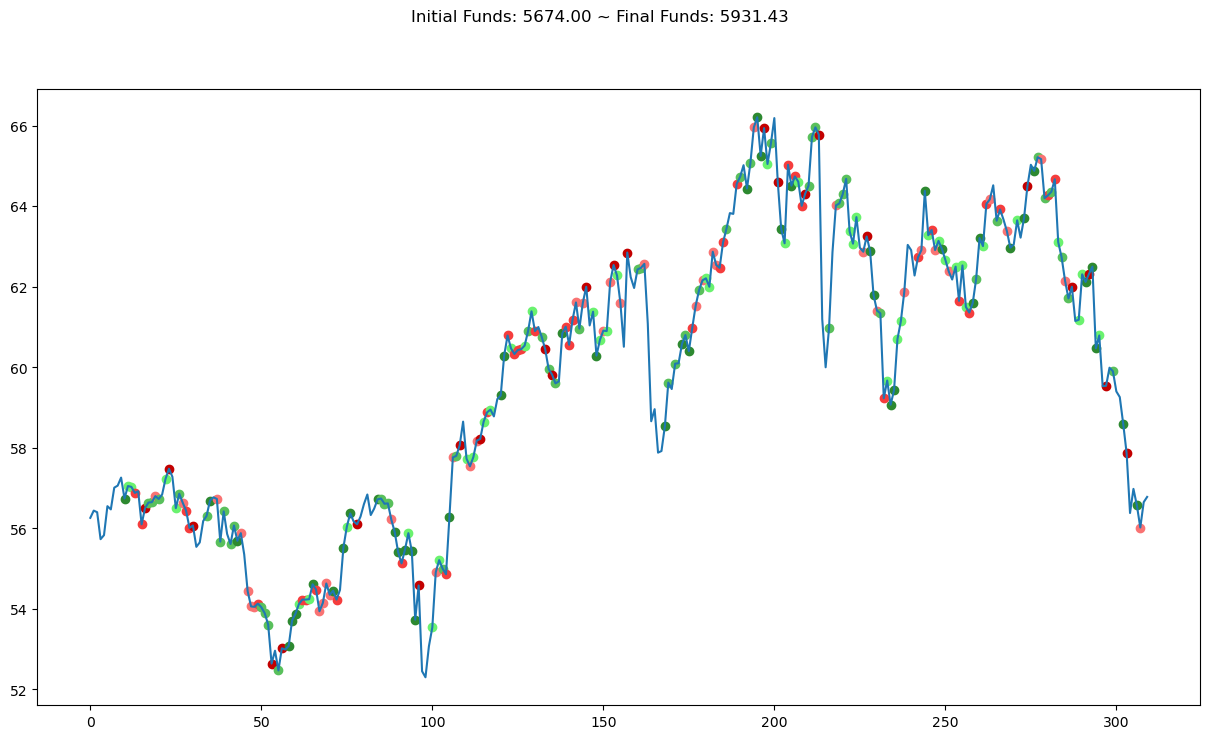

In [9]:
def render_policy_eval2(policy, filename):
    time_step = eval_env.reset()
    while not time_step.is_last():
        action_step = policy.action(time_step)
        time_step = eval_env.step(action_step.action)
        #print(time_step.observation)
    env.render('human')
    env.save_render('luqui_test')

def render_policy_eval(policy, filename):
    time_step = eval_env.reset()
    while not time_step.is_last():
        action_step = policy.action(time_step)
        time_step = eval_env.step(action_step.action)
    plt.figure(figsize=(15, 8))
    env.save_render(filename)
    
render_policy_eval(random_policy, './evals/test_env.jpg')

In [10]:
time_step = eval_env.reset()
while not time_step.is_last():
    action_step = random_policy.action(time_step)
    time_step = eval_env.step(action_step.action)
    #print(time_step)